In [2]:
import xarray as xr
from glob import glob
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import datetime as dt
from dateutil.relativedelta import relativedelta
from itertools import repeat
%matplotlib inline

/home/fiaz/anaconda3/envs/ML/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/fiaz/anaconda3/envs/ML/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
prc=np.load('/neelin2020/ML_input/imerg-era5/ocn/prc_ocn/prc_oceans_2015_01_01.npy')
prc_tm1=np.load('/neelin2020/ML_input/imerg-era5/ocn/prc_ocn_tm1/prc_oceans_tm1_2015_01_01.npy')
hbl=np.load('/neelin2020/ML_input/imerg-era5/ocn/hbl_ocn/hbl_oceans_2015_01_01.npy')
hlft=np.load('/neelin2020/ML_input/imerg-era5/ocn/hlft_ocn/hlft_oceans_2015_01_01.npy')
hsat_lft=np.load('/neelin2020/ML_input/imerg-era5/ocn/hsat_lft_ocn/hsat_lft_oceans_2015_01_01.npy')

In [12]:
instab=(hbl-hsat_lft)*340./hsat_lft
subsat=(hsat_lft-hlft)*340./hsat_lft

(array([1.770000e+03, 1.369100e+04, 1.224000e+05, 6.481570e+05,
        1.127867e+06, 1.809247e+06, 2.676003e+06, 7.643440e+05,
        4.010000e+02, 7.200000e+01]),
 array([-0.98383461, -0.79774325, -0.61165189, -0.42556053, -0.23946916,
        -0.0533778 ,  0.13271356,  0.31880492,  0.50489628,  0.69098764,
         0.877079  ]),
 <BarContainer object of 10 artists>)

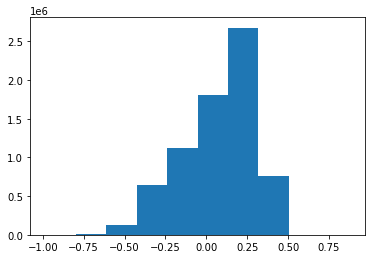

In [13]:
plt.hist(instab)

In [5]:
prc.size,prc_tm1.size,hbl.size
assert hbl.size==prc.size
assert hsat_lft.size==prc.size
assert hlft.size==prc.size


In [6]:
pcp_bins=2**(np.arange(-2.,8.125,0.125))
pcp_bins=np.insert(pcp_bins,0,1e-3)
pcp_bins=np.insert(pcp_bins,0,0)
pcp_bin_center=(pcp_bins[1:]+pcp_bins[:-1])*0.5
# lrh.size

(-5.1, 257.6453184067078)

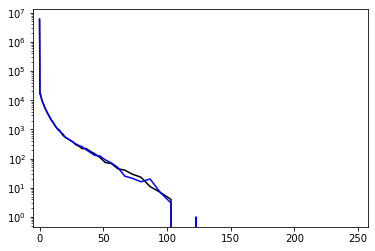

In [7]:
pcp_hist=np.histogram(prc,pcp_bins)[0]
pcp_tm1_hist=np.histogram(prc_tm1,pcp_bins)[0]

plt.plot(pcp_bin_center,pcp_hist,c='black')
plt.plot(pcp_bin_center,pcp_tm1_hist,c='blue')

plt.yscale('log')
plt.xlim(left=-5.1)

(0.0, 10.0)

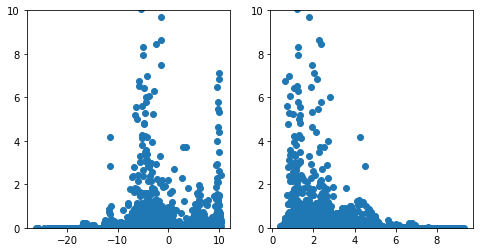

In [8]:
idx=10000
fig,axx=plt.subplots(1,2,figsize=(8,4))
ax=axx[0]
ax.scatter((340*(hbl-hsat_lft)/hsat_lft)[:idx],prc[:idx])
ax.set_ylim(0,10)
ax=axx[1]
ax.scatter((340*(hsat_lft-hlft)/hsat_lft)[:idx],prc[:idx])
ax.set_ylim(0,10)

In [74]:
instab_bins=np.arange(-28,18,2)
subsat_bins=np.arange(-2,24,1)

In [80]:
def bin_prc(precip,x,xbins):
    dx=abs(np.diff(xbins))[0]
    xind=np.int_((x-xbins[0])/dx)
    prc_binned=np.zeros((xbins.size))
    for i in np.arange(xbins.size):
        ind=np.where(xind==i)
        prc_binned[i]=precip[ind].mean()
    return prc_binned

def bin_prc_2D(precip,x,y,xbins,ybins):
    dx=abs(np.diff(xbins))[0]
    dy=abs(np.diff(ybins))[0]
    xind=np.int_((x-xbins[0])/dx)
    yind=np.int_((y-ybins[0])/dy)

    prc_binned=np.full((xbins.size,ybins.size),np.nan)
    prc_2D_pdf=np.full((xbins.size,ybins.size),np.nan)

    for i in np.arange(xbins.size):
        for j in np.arange(ybins.size):
            ind=np.where(np.logical_and(xind==i,yind==j))[0]
            prc_binned[i,j]=precip[ind].mean()
            prc_2D_pdf[i,j]=ind.size
    prc_2D_pdf=prc_2D_pdf/(prc_2D_pdf.sum()*dx*dy)
    return prc_binned,prc_2D_pdf


In [76]:
prc_instab_binned=bin_prc(prc,instab,instab_bins)
prc_subsat_binned=bin_prc(prc,subsat,subsat_bins)

/tmp/ipykernel_331567/1502668297.py:7: RuntimeWarning: Mean of empty slice.
  prc_binned[i]=precip[ind].mean()


In [78]:
prc_cape_sub_binned,prc_jpdf=bin_prc_2D(prc,instab,subsat,
                                       instab_bins,subsat_bins)

[]
[]
[]
[]
[ 320371  322064  618869  620562  917367  919060 1211674 1215865 1217558
 1218403 1510172 1514363 1516056 1516901 1808670 1812861 1814554 1815399
 2107168 2113052 2405666 3002663 3002664 3002665]
[  6555  13196  21873  21874  23566 305053 305055 614678 913176]
[  13194   13195   13988   13989   13990   14778   14779   15568   15569
   15570   15571   16373   16374   16375   17186  311692  311693  311694
  312486  312487  312488  313275  313276  313277  314067  314068  314069
  314871  314872  314873  315684  315685  610190  610191  610192  610984
  610985  610986  611773  611774  611775  612564  612565  612566  612567
  613368  613369  613370  613371  614182  908688  908689  909482  909483
  910271  910272  910273  911060  911061  911062  911063  911064  911866
  911867  911868  911869  912680  913506 1207186 1207187 1207980 1207981
 1208769 1208770 1209558 1209559 1209560 1209561 1209562 1210364 1210365
 1210366 1211178 1212003 1505684 1505685 1506478 1506479 1507267 15072

/tmp/ipykernel_331567/1502668297.py:23: RuntimeWarning: Mean of empty slice.
  prc_binned[i,j]=precip[ind].mean()


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3002662 3003488 3301160 3301161 3301162 3301163 3599658]
[  20180   22721  318678  320372  321219  322909  617176  618870  618871
  619717  621407  917368  918215  919905 1212500 1213332 1215866 1216713
 1217559 1510173 1510998 1510999 1511830 1514364 1515211 1516057 1808671
 1808672 1809496 1809497 1809498 1812862 1813709 1814555 2107169 2107170
 2107171 2107994 2107995 2111359 2111360 2112207 2113053 2405667 2405668
 2405669 2405670 2406492 2409857 2704164 2704165 2704166 2704167 2704990
 3002666 3002667 3003491 3003492 3008546 3301164 3301165 3301166]
[   6556    6557    8244   10737   12383   13197   13991   17682   17683
   17684   17685   18508   18509   19340   19341   21875   22722   23567
   24411  305054  306742  309235  310881  311695  312489  316180  316181
  316182  316183  317006  317007  317838  317839  320373  603551  603552
  603553  607733  609379  610193  610987  614679  614680  614681  615504
  615505  615506  616336  90

[]
[]
[]
[]
[]
[]
[]
[]
[3003489 3003490 3004320 3301986 3301987 3301989 3301990 3599659 3599660
 3599661 3599662 3599663 3599664 3600484 3898156 3898157 3898158 3898159
 3898160 4196654 4196655 4495152 4495153 4495154 4793651]
[    611     612    1436    5701  299109  299110  299934  304199  319524
  321220  321221  322065  322910  323766  597607  597608  598432  602697
  618022  618872  619718  619719  620563  621408  896105  896106  896107
  896930  896931  901196  902052  915674  916520  917369  918216  919061
 1194603 1194604 1194605 1195428 1195429 1214172 1215018 1215867 1216714
 1218404 1493102 1493926 1493927 1494774 1511831 1512670 1514365 1515212
 1516902 1793272 1810328 1810329 1810330 1811168 1812863 1813710 1815400
 2107996 2108826 2108827 2108828 2112208 2406493 2406494 2406495 2407324
 2409858 2410705 2704168 2704169 2704991 2704992 2704993 2704994 2704995
 2704996 2708355 3002668 3003493 3003494 3003495 3003496 3006853 3007701
 3301991 3301992 3305351 3307044 3898161 3

[  47317   48276   48278   48279   48280   49242   49243   49244   49245
   49246   49247   49248   50217   50218   51197  345814  345815  346774
  346776  346777  346778  346779  346782  346783  347739  347740  347741
  347742  347743  347744  347745  347746  347747  348714  348715  348716
  349694  642424  642425  643360  643361  643362  644319  644320  645272
  645273  645274  645275  645278  645279  645280  645281  646237  646238
  646239  646240  646241  646242  646243  646244  646245  646246  647212
  647213  647214  647215  647216  647217  939083  939998  940923  941859
  941860  942817  942818  942819  942820  943769  943770  943771  943772
  943776  943778  943779  944735  944736  944737  944738  944739  944742
  944743  945711  945712  945713  945715  977647 1237581 1238496 1238497
 1239421 1239422 1240358 1240359 1241315 1241317 1242269 1242270 1242276
 1242277 1243235 1243236 1243239 1243240 1243241 1244210 1244211 1244212
 1276146 1536994 1536995 1537918 1537919 1537920 15

[   1057    1896    1897 ... 6875372 6876200 6877024]
[   3604    3605    3606 ... 6884303 6884304 6885142]
[   5322    5323    7030 ... 6901740 6902657 6903573]
[  27351   27352   27353 ... 6904484 6905396 6905397]
[  30848   30849   30850   30851   30852   31722   31723   31724   31725
   31726   31727   31728   31729   31730   31731   31732   32611   32612
   32613   32614   32615   32616   32617   32618   32619   32620   32621
   32622   33524   33525   33526   33527   33528   33529   33530   33531
   33532   33533   33534   33535   34446   34448   35367  330222  330223
  330224  330225  330226  330227  330228  330229  330230  331111  331112
  331113  331114  331115  331116  331117  331118  331119  331120  332025
  332026  332027  332028  332029  332030  332031  332032  332033  332946
  332950  333865  334784  629609  629610  629611  629612  629613  629614
  629615  629616  629617  629618  630523  630524  630525  630526  630527
  630528  630529  630530  630531  631444  631445  6314

[]
[]
[]
[]
[]
[]
[    639     640     641     642    1465    1466    1467    1468    1469
    1470    2310    2311    2312    2313    2314    2315    3162    3163
  299137  299138  299139  299140  299963  299964  299965  299966  299967
  299968  300808  300809  300810  300811  300812  301659  301660  301661
  597635  597636  597637  597638  598461  598462  598509  599306  599307
  599308  600158  604438  896959 2090951 3005160 3005161 3005162 3005163
 3005164 3302820 3302821 3303658 3303659 3601316 3601317 3601318 3601319
 3601320 3898984 3898985 3899814 4197481 4197482 4197483 4495156 4495157
 4495978 4495979 5075105 5075931 5075932 5075933 5075934 5092148 5092149
 5092150 5373603 5373604 5373605 5373606 5672101 5672102 5672103 5970599]
[    616     617     618 ... 5378675 5382079 5680577]
[    239    1058    1059 ... 6879456 6879457 6880247]
[   3608    3609    4467 ... 6903577 6904489 6904491]
[   5324    5325    6175 ... 6903578 6903580 6903582]
[   7886    7887    8726 ... 690631

[  58123   59104   60090   61087   62099   63119  231564  233754  234840
  355624  356620  359585  360595  360596  361616  530061  531155  532252
  653129  653130  654122  655118  655120  656095  657085  658081  658082
  659093  828559  830750  951628  952621  952622  953616  953617  953618
  954593  954597  955582  956577  956578  956579  957590 1251119 1252115
 1252116 1252117 1253091 1253092 1254077 1254078 1255075 3219819 3219820
 3220902 3221982 3223063 3517231 3518317 3518318 3797049 3815728 3815729
 3816816 4094452 4095547 4110942 4113130 4113131 4114226 4114227 4114228
 4391849 4392950 4409440 4410535 4411628 4411629 4412725 4412726 4689242
 4690347 4707938 4709033 4709034 4710126 4710127 4711224 4987740 5006436
 5007531 5007532 5008624 5008625 5009722 5304934 5306029 5306030 5307122
 5307123 5308220 5603432 5604527 5604528 5605620 5605621 5606717 5606718
 5607805 5900829 5901929 5901930 5903024 5903025 5903026 5904118 5904119
 5905214 5905215 5905216 5906301 5906302 5906303 61

[   2755    3610    3611 ... 6907232 6907233 6908148]
[   5326    5327    6181 ... 6909067 6909068 6909069]
[   7888    7889    7890 ... 6909989 6910909 6910910]
[  10397   16073   16074 ... 6910899 6910900 6911837]
[  34472   34473   34474 ... 6919491 6920477 6920478]
[  39947   40862   40863 ... 6932553 7126413 7127537]
[  16371   17179   17180 ... 7156675 7156676 7157919]
[  24748   29047   31688 ... 7152992 7154213 7154214]
[  32570   61088   61089 ... 7143499 7144661 7144662]
[  90056  220546  220547 ... 7108941 7108942 7110032]
[ 204866  204867  205989 ... 7096789 7096790 7097880]
[ 248948  248949  248950  248951  250049  250050  250051  250052  251151
  251152  251153  252255  252256  252257  253367  253368  254485  254486
  254487  255609  255610  547446  547447  547448  547449  547450  548547
  548548  548549  548550  549648  549649  549650  549651  550753  550754
  550755  551864  551865  551866  552983  552984  552985  554107  554108
  555231  845945  845946  845947  845948 

[     70      71      72 ... 7163018 7163019 7163020]
[    218     219    1037 ... 7161716 7163026 7163027]
[    171     172     198 ... 7163667 7163668 7163669]
[    173     174     175 ... 7163705 7163706 7163707]
[  10323   10324   11148 ... 7163054 7163055 7163057]
[  18007   18008   18838 ... 7161748 7161749 7163058]
[  24750   25604   25605 ... 7154218 7154220 7155446]
[  31681   32562   32569 ... 7133436 7134572 7138004]
[  78857   78858   78859 ... 7128921 7128922 7128923]
[ 199177  199178  200323 ... 7124435 7125559 7146462]
[3526157 3526158 3527245 3527246 3822489 3822490 3822491 3822492 3822493
 3822494 3823570 3823571 3823572 3823573 3823574 3823575 3823576 3823577
 3824651 3824652 3824653 3824654 3824655 3824656 3824657 3824658 3825739
 3825740 3825741 3825742 3825743 3825744 3825745 3825746 3826832 3826833
 3826834 3826835 3826836 3826837 3827926 3827927 3827928 3827929 3827930
 3827931 3827932 3829018 3829019 3829020 3829021 3829022 3829023 3829024
 3830114 3830115 38301

[     59      60     268 ... 6926601 6926602 6926603]
[     78      79     290 ... 6926604 6926605 6926606]
[    809     818    1643 ... 7156013 7156014 7156015]
[      0       9      10 ... 7163659 7163660 7163661]
[    161     515     516 ... 7163903 7163904 7163905]
[  12783   12784   13597 ... 7163924 7163925 7163926]
[  20222   20223   22217 ... 7162980 7163807 7163808]
[  23062   23903   24756 ... 7163805 7163806 7163815]
[  28179   29044   29045 ... 7163816 7163817 7163818]
[  31685   31686   32565 ... 7163826 7163827 7163828]
[  35296   35297   35298 ... 7158636 7158637 7158638]
[  76102   76103   76104 ... 7146460 7147640 7147641]
[3215757 3836780 3837903 3837904 3837905 3839025 3839026 3839027 3839028
 3840150 3840151 4134156 4135278 4135279 4136401 4136402 4136403 4136404
 4137522 4137523 4137524 4137525 4137526 4431534 4432653 4432654 4433775
 4433776 4433777 4434899 4434900 4434901 4434902 4436020 4436021 4436022
 4436023 4436024 4544578 4544579 4545630 4545631 4545632 454

[    759     760     761 ... 7163078 7163079 7163080]
[    444     801     802 ... 7156262 7156263 7162438]
[    155     305     306 ... 7163291 7163292 7163293]
[     12     156     157 ... 7163775 7163933 7163934]
[    491     492     493 ... 7163881 7163882 7163928]
[  16236   16237   17041 ... 7163783 7163784 7163785]
[  18690   18691   18692 ... 7163787 7163788 7163789]
[  30815   30816   31694 ... 7160353 7160354 7160355]
[  40333   41250   41251 ... 7128564 7129688 7153674]
[  38982   39895   41714 ... 7146463 7146464 7147645]
[  40801   40802   40803 ... 7106559 7107068 7108148]
[  48477   49441   49442 ... 7105480 7106560 7107640]
[  83788   84903  384528  384529  384530  648390  648391  649369  649370
  649371  946887  946888  946889  947866  947867  947868 1245384 1245385
 1245386 1542903 2321359 2321360 2322453 2618761 2618762 2619856 2619857
 2619858 2622042 2916157 2916158 2916159 2917260 2917261 2920540 3335844
 3335845 3634341 3634342 3634343 3942439 3943455 3944479 394

[  42158   42159   43075 ... 7158224 7158225 7158226]
[  42855   42856   42857 ... 7104396 7109816 7110909]
[  41711   42622   43535 ... 7102240 7103320 7108726]
[  47516   47517   47518 ... 7094611 7106561 7107641]
[ 651333  946890  947869 ... 7103324 7104400 7105481]
[3632391 3632392 3632393 3633371 3633372 3633373 3640947 3931869 3931870
 3939445 3940432 4236972 4237943 4237944 4238930 4239926 4240935 4536441
 4536442 4537428 4537429 4538424 4539433 4834940 4835926 4835927 4836922
 4837931 5134424 5135420 5136429]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[  17429  246943  248038 ... 7116050 7116051 7116065]
[     20      88     551 ... 7123905 7125021 7125022]
[     89     576     577 ... 7154023 7161767 7163084]
[    144     145     146 ... 7163538 7163760 7163761]
[    435     436     457 ... 7162854 7162855 7162856]
[    313     449     450 ... 7163430 7163431 7163751]
[     13     314     315 ... 7163749 7163750 7163936]
[   7299    8044    8045 ... 7163643 7163877 7163878]
[  17846   17847  

[]
[]
[]
[]
[]
[]
[]
[   7735    7736    7737 ... 7161849 7163164 7163165]
[   6025    6026    6027 ... 7163212 7163213 7163214]
[    104     105     106 ... 7162888 7163215 7163216]
[    110     120     121 ... 7163948 7163950 7163951]
[    326     327     328 ... 7163757 7163946 7163947]
[    324     325     382 ... 7163866 7163944 7163945]
[    323    1144    2054 ... 7163590 7163591 7163592]
[  18659   18660   18661 ... 7163408 7163409 7163593]
[  20332   20333   20334 ... 7155282 7156516 7157761]
[  22034   22035   22883 ... 7163397 7163398 7163399]
[  31485   32365   32366 ... 7162080 7163392 7163393]
[  43315   43316   43328 ... 7156980 7156981 7158233]
[  53339   54050   54323 ... 7102251 7102252 7103331]
[  56016   56017   56298 ... 7104407 7105486 7105487]
[  57293   58290   59261 ... 7096810 7099000 7104404]
[ 100278  102421  103495  103496  104574  104575  105656  105657  106745
  400919  400920  985304  993632  993633  994712  994713  994714  994715
  994716 1281525 128266

[    351     352     353 ... 7113351 7113352 7114449]
[    354    1172    2860 ... 7157948 7159210 7163567]
[  60042   60043   60044 ... 7161785 7163563 7163564]
[  63527   63528   64547 ... 7163856 7163857 7163858]
[  34201   34202   35121 ... 7149420 7158641 7159916]
[  36960   36962   36963 ... 7161207 7162517 7163840]
[  38805   38806   39715 ... 7129259 7129260 7130389]
[  41544   42453   52874 ... 7117797 7117798 7117799]
[  81825   82431   82432 ... 7101496 7101497 7102573]
[  80722   80723   80724 ... 7080632 7080633 7081726]
[  80727   80728   81833 ... 7060698 7060699 7060700]
[ 100253  101327  101328  102403  102404  103478  396586  397669  398749
  399823  399824  400900  400901  401975  401976  693998  696166  697246
  697247  698320  698321  699397  699398  700473  700474  701552  984757
  992495  992496  992497  993580  993581  993583  993584  993585  994663
  994664  995743  995744  996818  996819  997895  997896  998971  998972
 1000050 1001132 1284377 1289855 1289857 

[ 158821  161007  166503  176406  185843  192485  193654  193655  194825
  195978  457319  459504  459505  460601  460602  465001  474904  482053
  483194  483195  484347  490983  492152  492153  493323  744961  755817
  758002  758003  759099  759100  760201  763499  771193  771523  771656
  772291  773402  780552  780553  781692  781693  781694  782845  782846
 1043459 1052141 1053223 1054315 1056501 1057598 1069691 1070021 1070789
 1071900 1075603 1075604 1076743 1077877 1077879 1077880 1079021 1079049
 1079050 1079051 1080190 1080191 1080192 1081343 1081344 1157591 1341957
 1350639 1352813 1354998 1354999 1356095 1356096 1357197 1368189 1368519
 1368520 1369287 1370398 1370400 1374101 1375240 1375241 1376375 1376376
 1376377 1376378 1376405 1377518 1377519 1377520 1377521 1377548 1377549
 1378662 1378663 1378689 1379815 1379816 1379842 1380975 1456089 1641558
 1653496 1654594 1655695 1667017 1667786 1668896 1668899 1670328 1676019
 1677160 1677161 1678313 1678314 1679473 1689611 19

[]
[]
[]
[]
[]
[]
[]
[]
[ 447566  746064 1044562 1343060 6230934 6232057 6232058 6529432 7029757]
[ 149068 1037900 1039026 1336398 1337524 1339744 1340849 1340850 1341959
 1341960 1341961 1341962 1343063 1343065 1343066 1637138 1638242 1638243
 1639347 1639348 1640459 1936742 1937845 1937846 1937847 1938957 2003082
 2003083 2236343 2236344 3191536 3475962 3774460 3790755 3790756 4090360
 4388859 4389964 4391066 4391067 4397659 4991357 4992453 5537267 5835765
 5887948 5889047 5933559 6117925 6119028 6411987 6416423 6417526 6432761
 6710485 6714921 6716024 6731259 6781245 6781246 7013419 7014522 7077538
 7078641 7079743 7151244 7152460]
[ 140131  140132  437489  437490  438631  439770  439773  440904  440908
  442030  442035  735987  735988  737129  737132  738272  739402  739407
  740527  740528  741644  742748  742753  743854  743855  743858  743859
  744965  744966  744967  744968 1034485 1039025 1040142 1041246 1042351
 1042352 1042356 1043461 1043462 1043463 1043464 1043465 1043466 

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


/tmp/ipykernel_331567/2896804718.py:16: RuntimeWarning: divide by zero encountered in log10
  np.log10(prc_jpdf))


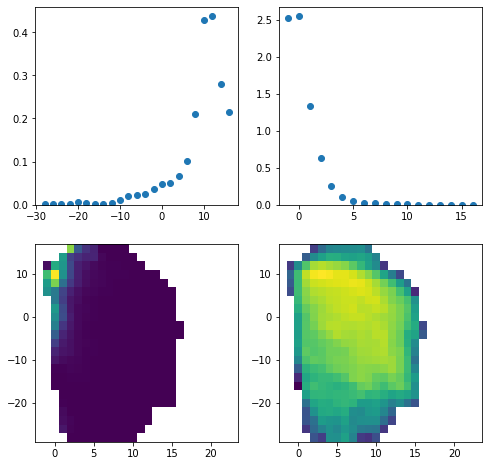

In [81]:
fig,axx=plt.subplots(2,2,figsize=(8,8))

ax=axx[0,0]
ax.scatter(instab_bins,prc_instab_binned)
ax.set_ylim(bottom=0)

ax=axx[0,1]
ax.scatter(subsat_bins,prc_subsat_binned)
ax.set_ylim(bottom=0)

ax=axx[1,0]
ax.pcolormesh(subsat_bins,instab_bins,prc_cape_sub_binned)

ax=axx[1,1]
ax.pcolormesh(subsat_bins,instab_bins,
              np.log10(prc_jpdf))

Why are several point supersaturated at the grid scale?